In [2]:
import tensorflow as tf

In [79]:
import os
import sys
import threading

import numpy as np
from PIL import Image

In [165]:
from matplotlib import pyplot as plt
%matplotlib notebook

In [16]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

In [175]:
BASE_DIR = os.path.abspath(os.path.dirname(sys.argv[1]))

In [176]:
BASE_DIR

'/home/yelyu/Work/Dataset/CamVid/Application'

In [74]:
def isImageFile(filePath):
    basename_ext = os.path.splitext(filePath)
    ext= basename_ext[1]
    ext = ext.lower()
    if ext=='.bmp': 
        return True
    if ext=='.png': 
        return True
    if ext=='.jpg': 
        return True
    return False

In [75]:
def filter_for_images(fileList):
    image_list = []
    for i in range(len(fileList)):
        fileName = fileList[i]
        if isImageFile(fileName):
            image_list.append(fileName)
    return image_list

In [376]:
def find_all_images(dir_path = './'):
    ls_files = os.listdir(dir_path)
    print("There are %d files found in total."%len(ls_files))
    image_list = filter_for_images(ls_files)
    print("And %d image files are found."%len(image_list))
    for i in range(len(image_list)):
        image_list[i] =os.path.join(dir_path,image_list[i])
    return image_list

In [77]:
imgList = find_all_images("../701_StillsRaw_full")

There are 702 files found.
in which, 701 image files are found.


In [141]:
def pase_Label_File(filePath):
    f = open(filePath,mode='r')
    lines = f.readlines()
    label_items=[]
    for i in range(len(lines)):
        item = lines[i]
        item = item.split()
        r = np.uint8(item[0])
        g = np.uint8(item[1])
        b = np.uint8(item[2])
        name = (item[3])
        print((r,g,b,name))
        label_items.append((r,g,b,name))
    f.close()
    return label_items

In [142]:
def readLabelTxt(filePath):
    basename_ext = os.path.splitext(filePath)
    ext = basename_ext[1].lower()
    label_items = None
    if ext!='.txt':
        raise ValueError('This is not txt file')
    else:
        label_items = pase_Label_File(filePath)
    return label_items  

In [143]:
label_items = readLabelTxt('../label_colors.txt')

(64, 128, 64, 'Animal')
(192, 0, 128, 'Archway')
(0, 128, 192, 'Bicyclist')
(0, 128, 64, 'Bridge')
(128, 0, 0, 'Building')
(64, 0, 128, 'Car')
(64, 0, 192, 'CartLuggagePram')
(192, 128, 64, 'Child')
(192, 192, 128, 'Column_Pole')
(64, 64, 128, 'Fence')
(128, 0, 192, 'LaneMkgsDriv')
(192, 0, 64, 'LaneMkgsNonDriv')
(128, 128, 64, 'Misc_Text')
(192, 0, 192, 'MotorcycleScooter')
(128, 64, 64, 'OtherMoving')
(64, 192, 128, 'ParkingBlock')
(64, 64, 0, 'Pedestrian')
(128, 64, 128, 'Road')
(128, 128, 192, 'RoadShoulder')
(0, 0, 192, 'Sidewalk')
(192, 128, 128, 'SignSymbol')
(128, 128, 128, 'Sky')
(64, 128, 192, 'SUVPickupTruck')
(0, 0, 64, 'TrafficCone')
(0, 64, 64, 'TrafficLight')
(192, 64, 128, 'Train')
(128, 128, 0, 'Tree')
(192, 128, 192, 'Truck_Bus')
(64, 0, 64, 'Tunnel')
(192, 192, 0, 'VegetationMisc')
(0, 0, 0, 'Void')
(64, 192, 0, 'Wall')


In [144]:
def findLabelColorofName(label_items,name):
    for i in range(len(label_items)):
        item = label_items[i]
        if(item[3]==name): return (item[0],item[1],item[2])
    return None

In [155]:
def findLabelNameofColor(label_items,color):
    for i in range(len(label_items)):
        item = label_items[i]
        if((item[0],item[1],item[2])==color or [item[0],item[1],item[2]]==color): return item[3]
    return None

In [156]:
findLabelColorofName(label_items,'VegetationMisc')

(192, 192, 0)

In [158]:
findLabelNameofColor(label_items,[0, 64, 64])

'TrafficLight'

# Write TFRecords

In [215]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [339]:
def convertDataToTFRecord(imagePath,tfrecoredPath):
    with tf.python_io.TFRecordWriter(tfrecoredPath) as writer:
            im = Image.open(imagePath)
            fim = np.array(im).astype(np.float32)
            #shape = np.array(np.shape(im)).astype(np.int64)
            shape = np.array(np.shape(im)).astype(np.float32)
            feature={'shape':_bytes_feature(tf.compat.as_bytes(shape.tostring())),
                     'train/image':_bytes_feature(tf.compat.as_bytes(fim.tostring()))}
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example.SerializeToString())

In [379]:
def convertImageToTFRecords(input_dir_path,output_dir_path):
    print("Input Directory is : %s"%input_dir_path)
    print("Output Directory is : %s"%output_dir_path)
    imgList = find_all_images(input_dir_path)
    convertImageToTFRecord(imgList,output_dir_path)
    print("Conversion Done.")

In [381]:
convertImageToTFRecords("../test","../test")

Input Directory is : ../test
Output Directory is : ../test
There are 12 files found in total.
And 6 image files are found.
OutPut Directory is : ../test
FileTfRecordsName is ../test/0001TP_006720.png.tfrecords
FileTfRecordsName is ../test/0001TP_006750.png.tfrecords
FileTfRecordsName is ../test/0001TP_006780.png.tfrecords
FileTfRecordsName is ../test/0001TP_006810.png.tfrecords
FileTfRecordsName is ../test/0001TP_006840.png.tfrecords
FileTfRecordsName is ../test/0001TP_006690.png.tfrecords
6 files in total are converted
Conversion Done.


In [382]:
convertImageToTFRecords("../701_StillsRaw_full","../tfr_images")

Input Directory is : ../701_StillsRaw_full
Output Directory is : ../tfr_images
There are 702 files found in total.
And 701 image files are found.
OutPut Directory is : ../tfr_images
FileTfRecordsName is ../tfr_images/Seq05VD_f04830.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_06720.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08047.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08023.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08103.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_008400.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f03630.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_009330.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f04530.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f02580.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f00420.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_01980.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_010170.png.tfrecords
F

FileTfRecordsName is ../tfr_images/0016E5_07560.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_05340.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_05880.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_04980.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_07440.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_008130.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08143.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_007890.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f02730.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f03900.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_009960.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08043.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f03000.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_01200.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_07650.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08001.png.tfrecords


FileTfRecordsName is ../tfr_images/0016E5_01710.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_07140.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_01140.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08027.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_05820.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f03690.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f03720.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f04350.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08119.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f00870.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_05010.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f01620.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_009870.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_01620.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_010020.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_07260.png.tfreco

FileTfRecordsName is ../tfr_images/Seq05VD_f04740.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f03690.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08135.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_06150.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_07985.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08107.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f01170.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f04170.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_04440.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_05550.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_01380.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f01230.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08079.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f05070.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08053.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f03780.png.tfreco

FileTfRecordsName is ../tfr_images/0016E5_08101.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_06090.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f01410.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f03360.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08640.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f03780.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_00720.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_06930.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f03720.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08087.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08520.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_05700.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_008040.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_007020.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_009000.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08009.png.tfrecords


FileTfRecordsName is ../tfr_images/Seq05VD_f03750.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_009210.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f03360.png.tfrecords
FileTfRecordsName is ../tfr_images/0001TP_010230.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f01110.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08190.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_08123.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f03180.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f01560.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_00390.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f03960.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_06360.png.tfrecords
FileTfRecordsName is ../tfr_images/Seq05VD_f02010.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f02040.png.tfrecords
FileTfRecordsName is ../tfr_images/0016E5_00901.png.tfrecords
FileTfRecordsName is ../tfr_images/0006R0_f02790.png.t

In [ ]:
convertImageToTFRecords("../LabeledApproved_full","../tft_labels")

# Read TFRecords

In [368]:
def readDatafromTFRecord(sess,tfrecoredPath):
    feature={'shape':tf.FixedLenFeature([],tf.string),
             'train/image':tf.FixedLenFeature([],tf.string)}
    filename_queue = tf.train.string_input_producer([tfrecoredPath],num_epochs=1)
    reader = tf.TFRecordReader()
    _,serialized_example =reader.read(filename_queue)
    features = tf.parse_single_example(serialized_example,features=feature)
    image = tf.decode_raw(features['train/image'],tf.float32)
    shape = tf.cast(tf.decode_raw(features['shape'],tf.float32),tf.int32)
    image = tf.reshape(image,shape)
    
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    img ,val_shape= sess.run([image,shape])
    print(val_shape)
    img = img.astype(np.uint8)
    plt.imshow(img)
    plt.show()
    # Stop the threads
    coord.request_stop()
    # Wait for threads to stop
    
    coord.join(threads)
    

[720 960   3]


<IPython.core.display.Javascript object>


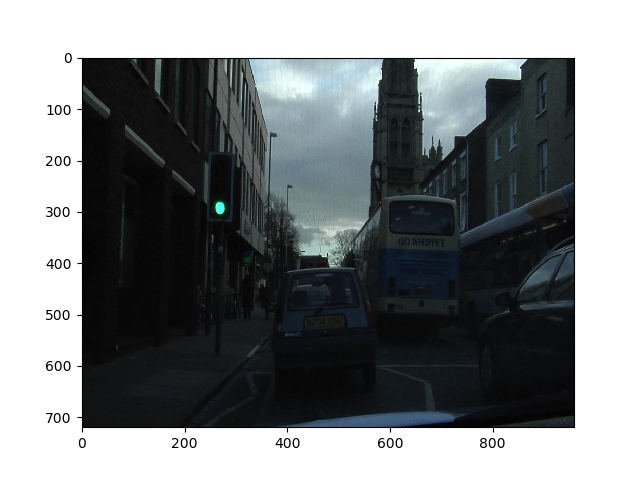

In [369]:
with tf.Session() as sess:
    readDatafromTFRecord(sess,'/home/yelyu/Work/Dataset/CamVid/test/0001TP_006690.png.tfrecords')